<a href="https://colab.research.google.com/github/DANGKHOIk22/data-science/blob/main/2_3_GridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

In [24]:
df=pd.read_csv("diabetes_prediction_dataset.csv")

In [25]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


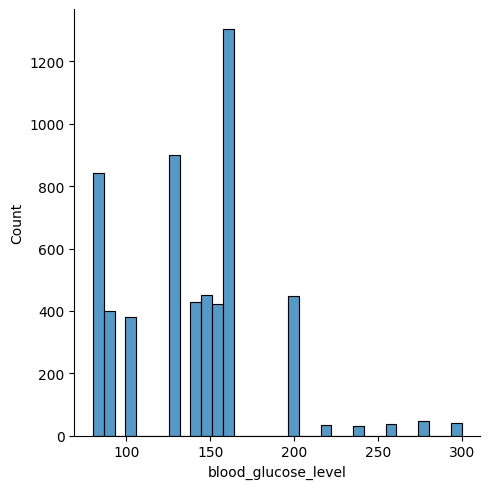

In [26]:
sns.displot(df,x='blood_glucose_level')

In [27]:
X=df.drop('diabetes',axis=1)
y=df['diabetes']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3,stratify=y)

In [29]:
trf1=ColumnTransformer([
    ('impute_age',SimpleImputer(),[1]),
    ('impute_gender',SimpleImputer(strategy='most_frequent'),[0])]
    ,remainder='passthrough')

In [30]:
trf2=ColumnTransformer([
    ('Enconder_smokinghist',OrdinalEncoder(),[4]),
    ('Encoder_gender',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0])
],remainder='passthrough')

In [31]:
trf3=ColumnTransformer([('scale',MinMaxScaler(),slice(0,8))])

In [32]:
trf4 = SelectKBest(score_func=chi2,k=5)

In [33]:
trf5=LogisticRegression()

In [34]:
pipe=make_pipeline(trf1,trf2,trf3,trf4,trf5)

In [35]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [1]),
                                                 ('impute_gender',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Enconder_smokinghist',
                                                  OrdinalEncoder(), [4]),
                                                 ('Encoder_gender',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 8, None))])),
                ('selectkbest',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x7e4ead1b8670>)),
                ('logisticregression', LogisticRegression())])

In [36]:
y_pre=pipe.predict(X_test)

In [37]:
print(accuracy_score(y_pre,y_test))

0.9127167630057803


In [48]:
parameters = {

             "selectkbest__k": [5, 10, 15],
        "logisticregression__penalty": ["l1", "l2"],
}

In [49]:
classifier=GridSearchCV(pipe,parameters,cv=5,scoring='accuracy')

In [50]:
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [51]:
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9124939656418251


In [52]:
print(classifier.best_params_)

{'logisticregression__penalty': 'l2', 'selectkbest__k': 5}
